# AAI614: Data Science & its Applications

*Notebook X.X: Practice with Data Cleaning Outliers*

In [2]:
import pandas as pd

data = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/income.csv')
data.head()

,INCOME,SEX,MARITAL.STATUS,AGE,EDUCATION,OCCUPATION,AREA,DUAL.INCOMES,HOUSEHOLD.SIZE,UNDER18,HOUSEHOLDER,HOME.TYPE,ETHNIC.CLASS,LANGUAGE
0,[75.000-,F,Married,45-54,1 to 3 years of college,Homemaker,10+ years,No,Three,NaN,Own,House,White,NaN
1,[75.000-,M,Married,45-54,College graduate,Homemaker,10+ years,No,Five,Two,Own,House,White,English
2,[75.000-,F,Married,25-34,College graduate,Professional/Managerial,10+ years,Yes,Three,One,Rent,Apartment,White,English
3,-10.000),F,Single,14-17,Grades 9 to 11,"Student, HS or College",10+ years,Not Married,Four,Two,Family,House,White,English
4,-10.000),F,Single,14-17,Grades 9 to 11,"Student, HS or College",4-6 years,Not Married,Four,Two,Family,House,White,English


In [6]:
import re

# Data Cleaning
def extract_first_number(value):
    match = re.search(r'\d+\.?\d*', value)
    return float(match.group()) if match else None

data['INCOME'] = data['INCOME'].apply(extract_first_number)

In [7]:
data.head()

,INCOME,SEX,MARITAL.STATUS,AGE,EDUCATION,OCCUPATION,AREA,DUAL.INCOMES,HOUSEHOLD.SIZE,UNDER18,HOUSEHOLDER,HOME.TYPE,ETHNIC.CLASS,LANGUAGE
0,75.0,F,Married,45-54,1 to 3 years of college,Homemaker,10+ years,No,Three,NaN,Own,House,White,NaN
1,75.0,M,Married,45-54,College graduate,Homemaker,10+ years,No,Five,Two,Own,House,White,English
2,75.0,F,Married,25-34,College graduate,Professional/Managerial,10+ years,Yes,Three,One,Rent,Apartment,White,English
3,10.0,F,Single,14-17,Grades 9 to 11,"Student, HS or College",10+ years,Not Married,Four,Two,Family,House,White,English
4,10.0,F,Single,14-17,Grades 9 to 11,"Student, HS or College",4-6 years,Not Married,Four,Two,Family,House,White,English


In [8]:
def detect_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)  # 25th percentile
    Q3 = data[column].quantile(0.75)  # 75th percentile
    IQR = Q3 - Q1  # Interquartile Range
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return outliers, lower_bound, upper_bound

In [10]:
# outliers in the income column
outliers, lower_bound, upper_bound = detect_outliers_iqr(data, 'INCOME')

In [11]:
print("\nIncome Column Outliers:")
print(outliers)
print(f"\nLower Bound: {lower_bound}")
print(f"Upper Bound: {upper_bound}")


Income Column Outliers:
Empty DataFrame
Columns: [INCOME, SEX, MARITAL.STATUS, AGE, EDUCATION, OCCUPATION, AREA, DUAL.INCOMES, HOUSEHOLD.SIZE, UNDER18, HOUSEHOLDER, HOME.TYPE, ETHNIC.CLASS, LANGUAGE]
Index: []

Lower Bound: -35.0
Upper Bound: 85.0


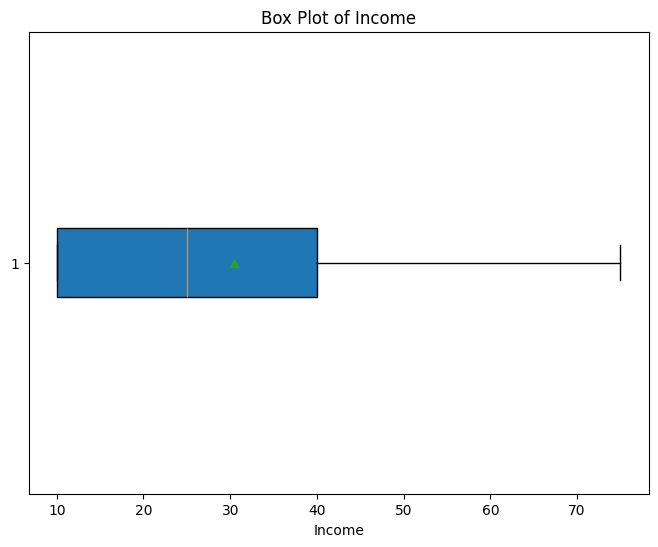

In [13]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.boxplot(data['INCOME'], vert=False, patch_artist=True, showmeans=True)
plt.title("Box Plot of Income")
plt.xlabel("Income")
plt.show()